In [228]:
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [229]:
os.chdir('C:/Users/Sushant/Documents/newspaper-word-count/Python_DS')
%pwd

'C:\\Users\\Sushant\\Documents\\newspaper-word-count\\Python_DS'

In [230]:
Macro = pd.read_csv('Macro.csv', header = 0, names = ['Year', 'GDP', 'CPI', 'MS', 'IR', 'FER', 'ER', 'NEPSE'])
Macro = Macro.drop('Year', 1)
Macro.head()

,GDP,CPI,MS,IR,FER,ER,NEPSE
0,355543.0,36.3,186.1,5.25,951.9,71.1,387.03
1,413428.0,37.2,214.5,5.00,1044.2,74.9,333.09
2,430396.0,38.3,224.0,4.38,1024.1,77.9,222.56
3,460325.0,40.1,245.9,4.25,1228.9,76.1,206.84
4,500699.0,41.7,277.3,3.50,1468.6,73.7,221.32


In [231]:
##Convert to time series by manually creating index
Macro = pd.DataFrame(data=Macro.values, columns = ['GDP', 'CPI', 'MS', 'IR', 'FER', 'ER', 'NEPSE'], index = pd.DatetimeIndex(start='2000/12/31', periods = 17, freq = 'A'))
Macro.head()

,GDP,CPI,MS,IR,FER,ER,NEPSE
2000-12-31,355543.0,36.3,186.1,5.25,951.9,71.1,387.03
2001-12-31,413428.0,37.2,214.5,5.00,1044.2,74.9,333.09
2002-12-31,430396.0,38.3,224.0,4.38,1024.1,77.9,222.56
2003-12-31,460325.0,40.1,245.9,4.25,1228.9,76.1,206.84
2004-12-31,500699.0,41.7,277.3,3.50,1468.6,73.7,221.32


In [232]:
#Write a function for plotting all the data
def TS_plot(Data, Nrows):
    for i in range(len(Data.columns)):
        subsm = Data[Data.columns[i]]
        fig = plt.figure(figsize=(32,12))
        ax = fig.add_subplot(Nrows, 2, i+1)
        ax.set_title(Data.columns[i],fontweight="bold", size=15)
        plt.plot(subsm)
    

In [233]:
#Write a function to calculate ADF test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    for i in timeseries.columns:
        #Perform Dickey-Fuller test:
        print ('Results of Dickey-Fuller Test for ' +(i))
        dftest = adfuller(timeseries[i], autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        print (dfoutput)

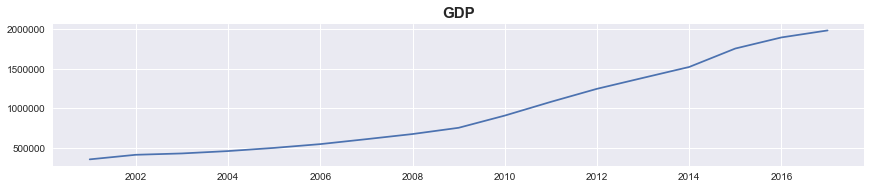

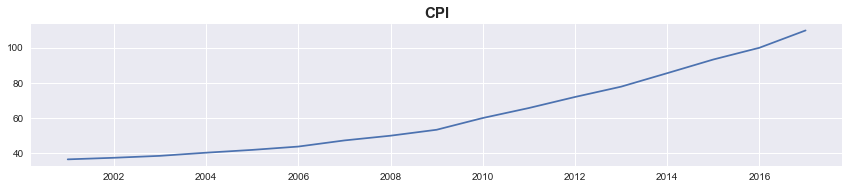

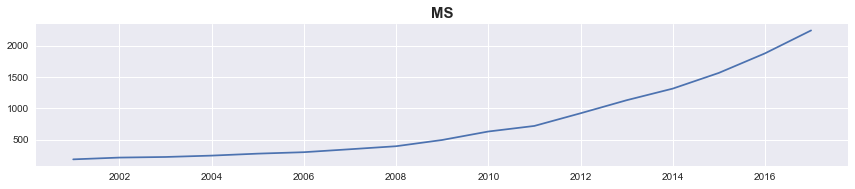

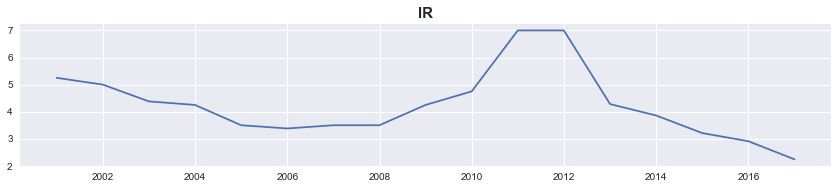

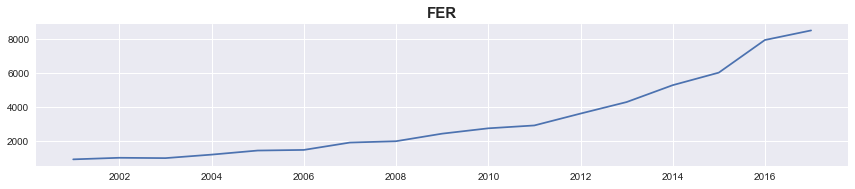

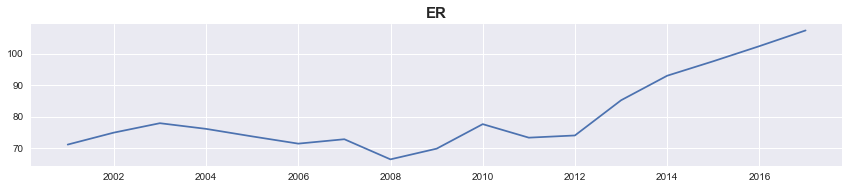

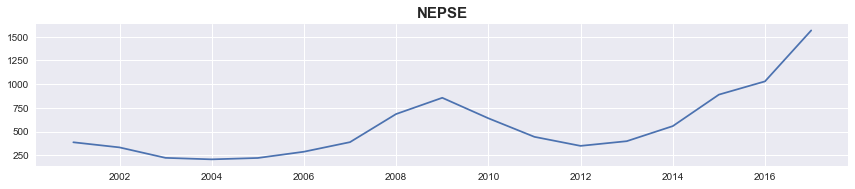

In [234]:
TS_plot(Macro,4)

Results of Dickey-Fuller Test for GDP
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    8.000000
dtype: float64
Results of Dickey-Fuller Test for CPI
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    9.000000
dtype: float64
Results of Dickey-Fuller Test for MS
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    8.000000
dtype: float64
Results of Dickey-Fuller Test for IR
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    8.000000
dtype: float64
Results of Dickey-Fuller Test for FER
Test Statistic                  1.281735
p-value                         0.996505
#Lags Used                    

C:\Users\Sushant\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


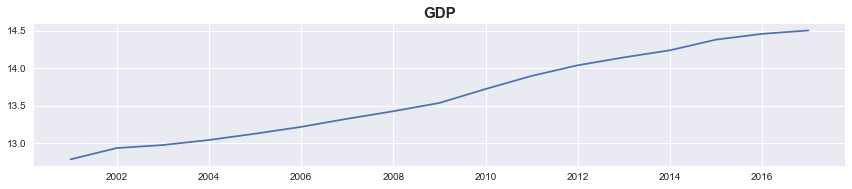

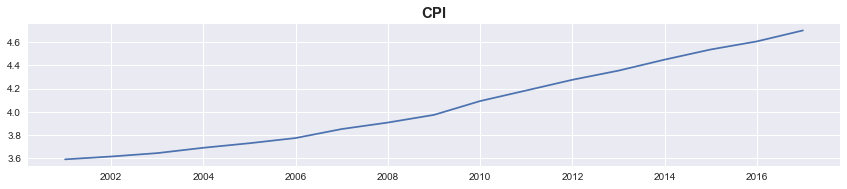

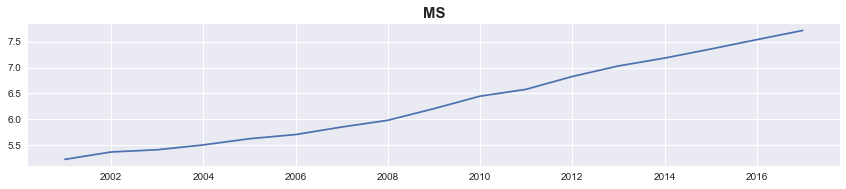

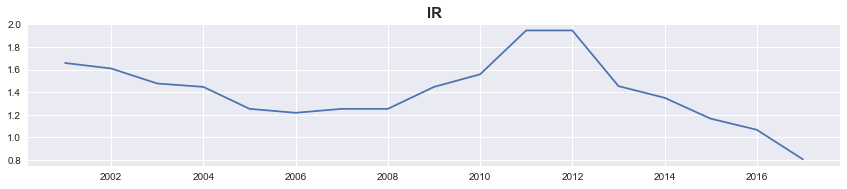

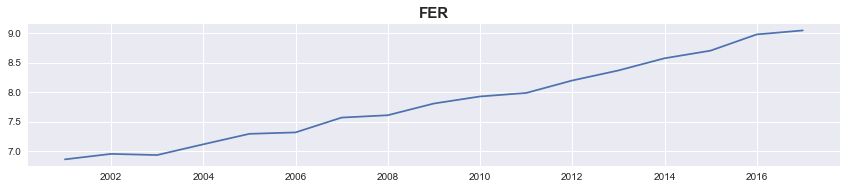

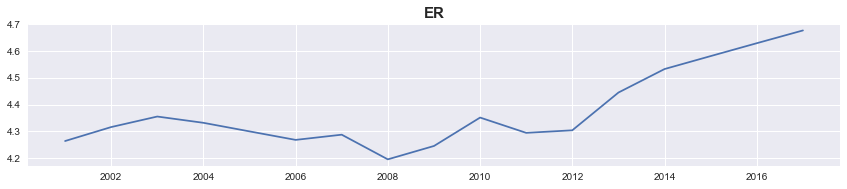

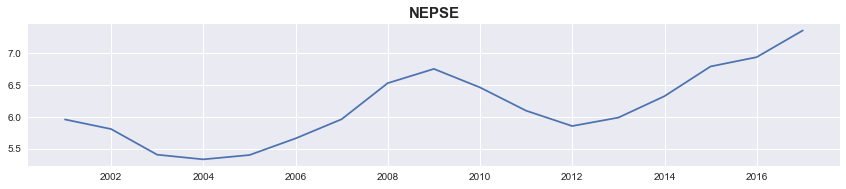

In [235]:
Macro = np.log(Macro)
test_stationarity(Macro)
TS_plot(Macro,4)

Results of Dickey-Fuller Test for GDP
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    8.000000
dtype: float64
Results of Dickey-Fuller Test for CPI
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    7.000000
dtype: float64
Results of Dickey-Fuller Test for MS
Test Statistic                 -2.828971
p-value                         0.054253
#Lags Used                      5.000000
Number of Observations Used    10.000000
dtype: float64
Results of Dickey-Fuller Test for IR
Test Statistic                 0.145730
p-value                        0.969048
#Lags Used                     6.000000
Number of Observations Used    9.000000
dtype: float64
Results of Dickey-Fuller Test for FER
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                  

C:\Users\Sushant\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


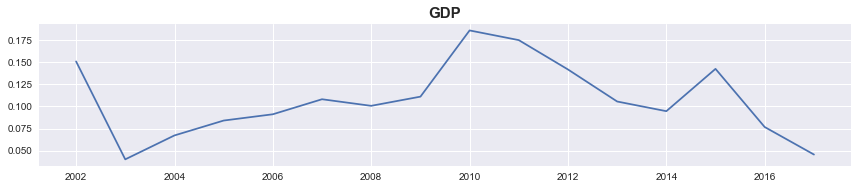

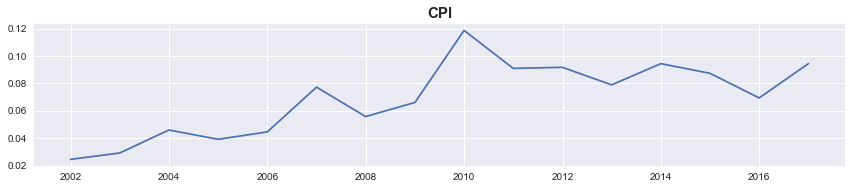

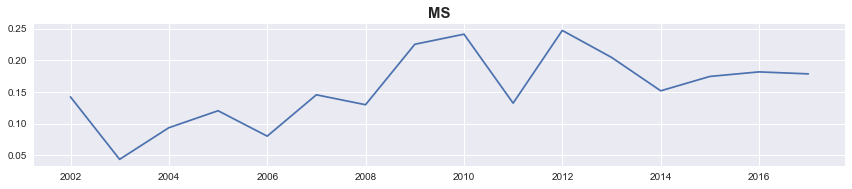

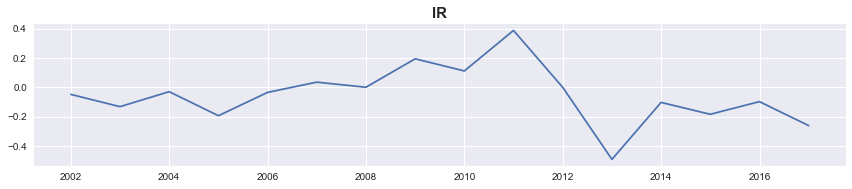

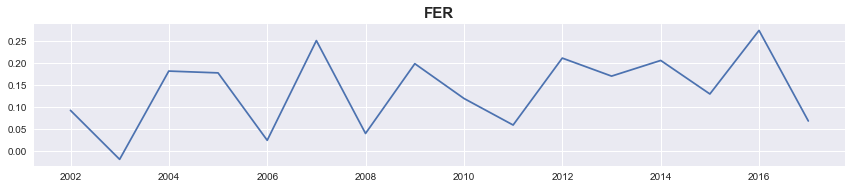

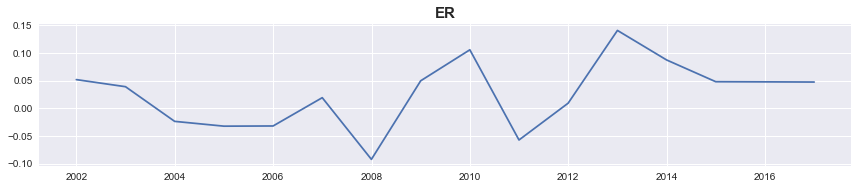

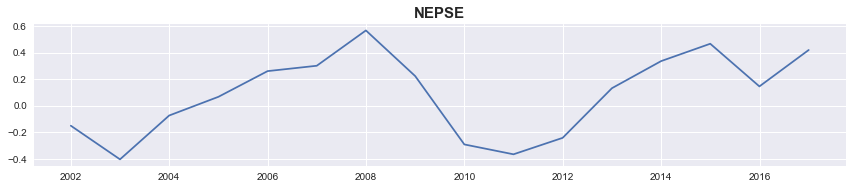

In [236]:
Macro = Macro.diff().dropna()
test_stationarity(Macro)
TS_plot(Macro,4)

Results of Dickey-Fuller Test for GDP
Test Statistic                -0.136335
p-value                        0.945697
#Lags Used                     5.000000
Number of Observations Used    9.000000
dtype: float64
Results of Dickey-Fuller Test for CPI
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    8.000000
dtype: float64
Results of Dickey-Fuller Test for MS
Test Statistic                -0.958461
p-value                        0.768112
#Lags Used                     5.000000
Number of Observations Used    9.000000
dtype: float64
Results of Dickey-Fuller Test for IR
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    7.000000
dtype: float64
Results of Dickey-Fuller Test for FER
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     8

C:\Users\Sushant\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


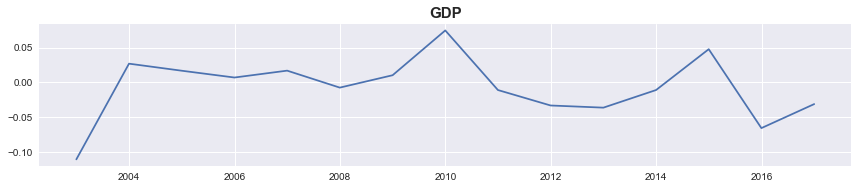

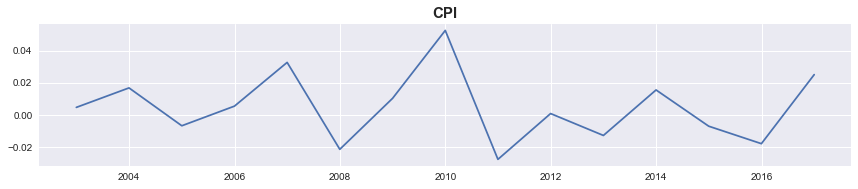

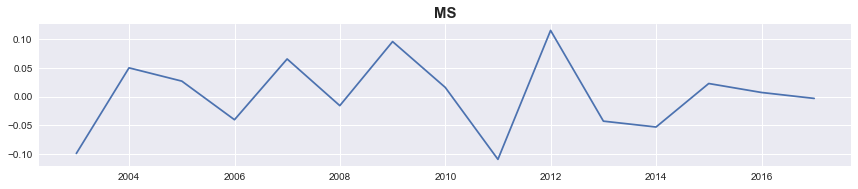

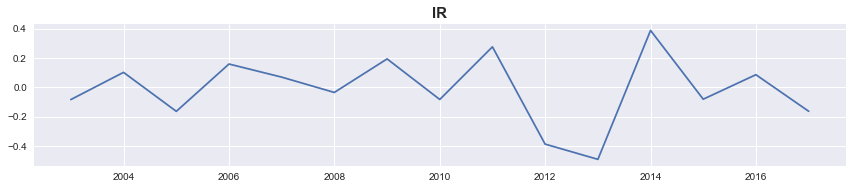

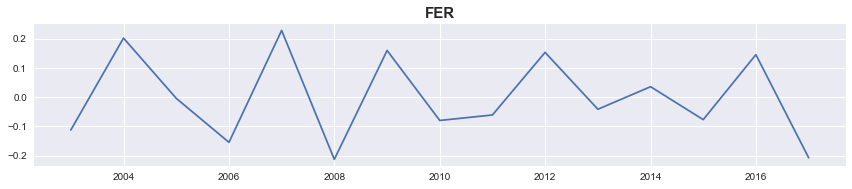

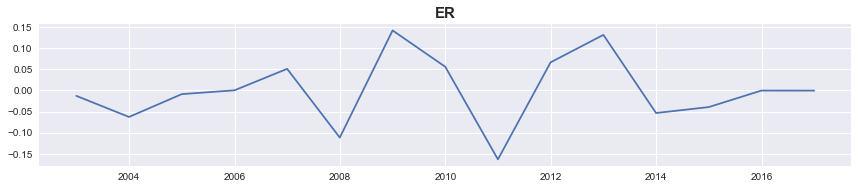

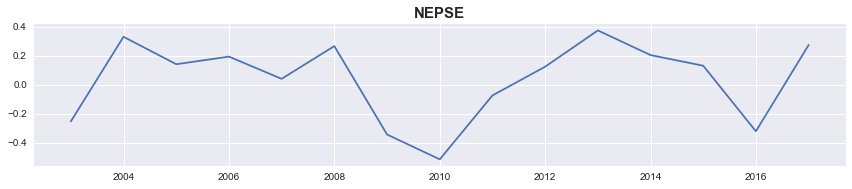

In [237]:
Macro = Macro.diff().dropna()
test_stationarity(Macro)
TS_plot(Macro,4)

In [238]:
Y = Macro['NEPSE']
X = Macro.drop('NEPSE',1)
X

,GDP,CPI,MS,IR,FER,ER
2002-12-31,-0.110615,0.004650,-0.098689,-0.083599,-0.111983,-0.012794
2003-12-31,0.027005,0.016785,0.049943,0.102259,0.201742,-0.062650
2004-12-31,0.016845,-0.006802,0.026896,-0.164026,-0.004115,-0.008668
2005-12-31,0.007082,0.005431,-0.040160,0.159269,-0.154106,0.000341
2006-12-31,0.016975,0.032660,0.065347,0.069775,0.227887,0.051123
2007-12-31,-0.007436,-0.021474,-0.015688,-0.034887,-0.212214,-0.111437
2008-12-31,0.010379,0.010301,0.095541,0.194156,0.159427,0.141956
2009-12-31,0.074794,0.052575,0.015933,-0.082930,-0.079464,0.055996
2010-12-31,-0.010920,-0.027719,-0.108965,0.276540,-0.060713,-0.162940
2011-12-31,-0.033137,0.000801,0.114908,-0.387766,0.152961,0.066511


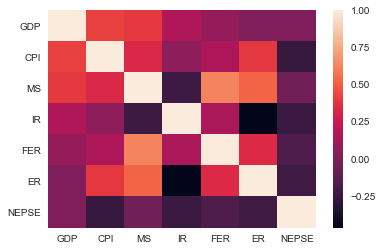

In [239]:
mat = Macro.corr()
sns.heatmap(mat, xticklabels=mat.columns.values,
            yticklabels=mat.columns.values)

In [240]:
X = sm.add_constant(X)
X.head()

,const,GDP,CPI,MS,IR,FER,ER
2002-12-31,1.0,-0.110615,0.004650,-0.098689,-0.083599,-0.111983,-0.012794
2003-12-31,1.0,0.027005,0.016785,0.049943,0.102259,0.201742,-0.062650
2004-12-31,1.0,0.016845,-0.006802,0.026896,-0.164026,-0.004115,-0.008668
2005-12-31,1.0,0.007082,0.005431,-0.040160,0.159269,-0.154106,0.000341
2006-12-31,1.0,0.016975,0.032660,0.065347,0.069775,0.227887,0.051123


In [241]:
reg = sm.OLS(Y, X).fit()
reg.summary()

C:\Users\Sushant\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  NEPSE   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                 -0.366
Method:                 Least Squares   F-statistic:                    0.3752
Date:                Fri, 08 Mar 2019   Prob (F-statistic):              0.876
Time:                        14:24:39   Log-Likelihood:                0.44186
No. Observations:                  15   AIC:                             13.12
Df Residuals:                       8   BIC:                             18.07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0429      0.091      0.474      0.648      -0.166       0.252
GDP            0.6851      2.498      0.274      0.791      -5.075       6.445
CPI           -1.7405      4.970     -0.350      0.735     -13.202       9.721
MS             0.2524      2.371      0.106      0.918      -5.214       5.719
IR            -0.4958      0.511     -0.970      0.361      -1.675       0.683
FER            0.0295      0.904      0.033      0.975      -2.055       2.114
ER            -1.3433      1.548     -0.868      0.411      -4.914       2.227
==============================================================================
Omnibus:                        0.827   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.776
Skew:                          -0.361   Prob(JB):                        0.678
Kurtosis:                       2.152   Cond. No.                         61.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""